In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("car_data.csv")
insured = df.copy()

# Data preprocessing
## Data cleaning

In [3]:
insured.head()
# engineV = engine volume/capacity = in liters

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2

In [5]:
# mean value imputation
insured["EngineV"] = insured["EngineV"].fillna(insured["EngineV"].mean())

In [6]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand             0
Price           172
Body              0
Mileage           0
EngineV           0
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4345 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4345.000000  4345.000000
mean    19418.746935   161.237284     2

In [7]:
insured = insured.dropna(subset=["Price"])
# The subset parameter specifies which column(s) to check for NaN values.
# “Remove all rows from the DataFrame insured where the column Price has a missing (NaN) value.”

In [8]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4173 non-null   object 
 3   Mileage       4173 non-null   int64  
 4   EngineV       4173 non-null   float64
 5   Engine Type   4173 non-null   object 
 6   Registration  4173 non-null   object 
 7   Year          4173 non-null   int64  
 8   Model         4173 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 326.0+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4173.000000  4173.000000  4173.000000
mean    19418.746935   164.088426     2.765514  2006.367362
st

In [9]:
# getting unique values
# insured["Brand"].unique()
# insured["Body"].unique()
# insured["Engine Type"].unique()
# insured["Registration"].unique()
insured["Model"].unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
       'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Hilux', 'Polo', 'Outlander',
       'A8', 'Touareg', 'Vito', 'Colt', '100', 'Z4', 'Pajero Wagon', 'X5',
       'Caddy', 'Camry', '528', 'TT', 'A4', 'G 55 AMG', 'X6', 'Galant',
       '525', 'Kangoo', 'ML 350', '730', 'Trafic', 'X5 M', 'S 350',
       'Lancer', 'E-Class', 'Scenic', '330', 'Passat B5', 'A3',
       'Land Cruiser Prado', 'Caravelle', 'Avensis', 'GL 320', 'GL 450',
       'Lancer X', '200', '520', 'Tiguan', 'Outlander XL', 'GLS 350',
       'A5', 'X6 M', 'Golf III', 'A 150', 'FJ Cruiser', 'Koleos',
       'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza', '80',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240',
       'Passat CC', 'I3', 'Multivan', 'Vaneo', 'X1', 'T5 (Transporter) ',
       'S 400', 'S 550', 'A4 Al

# Modeling

## Train Test Splitting

In [10]:
train,test = train_test_split(insured,train_size=0.8,random_state=1)
x_train = train.drop("Price",axis=1)
y_train = train[["Price"]]
x_test = test.drop("Price",axis=1)
y_test = test[["Price"]]

In [11]:
x_train
# y_train
# x_test 
# y_test 
# test

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
328,Audi,vagon,226,3.000000,Diesel,no,2006,A6
2881,Renault,van,150,2.300000,Diesel,yes,2012,Master
1480,Toyota,sedan,51,2.500000,Gas,yes,2014,Camry
399,Toyota,van,161,2.500000,Diesel,yes,2002,Hiace
79,Toyota,crossover,195,4.000000,Gas,yes,2003,Land Cruiser Prado
...,...,...,...,...,...,...,...,...
3020,Mercedes-Benz,crossover,128,3.000000,Diesel,yes,2013,ML 350
2883,Toyota,hatch,140,2.790734,Petrol,yes,2008,Auris
943,Mitsubishi,crossover,167,3.000000,Gas,yes,2008,Pajero Wagon
4142,Mercedes-Benz,sedan,215,3.200000,Petrol,yes,2003,E-Class


## Training

In [12]:
# Linear regression
x_obj_cols = list(x_train.select_dtypes("object").columns)
x_num_cols = list(x_train.select_dtypes(["int","float"]).columns)
# x_obj_cols
lr = LinearRegression()
sc = StandardScaler()
# ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown="ignore") 
# if unknown category is encoutered during transform, the catgory will be ignored but transfomration will be completed without error

preprocessor = ColumnTransformer([
    ("scaler",sc,x_num_cols),
    ("ohe",ohe,x_obj_cols),
])
pipeline = Pipeline([
    ("pp",preprocessor),
    ("model",lr)
])
lr_model = pipeline.fit(x_train,y_train)

In [71]:
# polynomial regression
poly = PolynomialFeatures(degree=2)
lr = LinearRegression()
sc = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore") 

preprocessor = ColumnTransformer([
    ("scale_poly",Pipeline([
        ("poly",poly),
        ("scale",sc),
    ]),x_num_cols),
    ("ohe",ohe,x_obj_cols),
],remainder="passthrough")
# the preprocessor performs PolynomialFeatures(degree=2) => StandardScaler() on x_num_cols and OneHotEncoder(handle_unknown="ignore") on x_obj_cols 
# in same step of the pipeline
poly_pipeline = Pipeline([
    ("pp",preprocessor),
    ("model",lr)
])
poly_model = poly_pipeline.fit(x_train,y_train)

## Testing

In [60]:
print(x_test.head(1))
print(y_test.head(1))
print(lr_model.predict(x_test.head(1)))
print(poly_model.predict(x_test.head(1)))

           Brand   Body  Mileage  EngineV Engine Type Registration  Year  \
2842  Mitsubishi  sedan      136      2.0      Petrol          yes  2008   

         Model  
2842  Lancer X  
       Price
2842  9500.0
[[7322.26088879]]
[[5361.10207152]]


In [ ]:
brand = str(input("Enter brand = "))
body = str(input("Enter body = "))
mileage = int(input("Enter mileage = "))
ev = int(input("Enter engine volume = "))
et = str(input("Enter engine type = "))
reg = str(input("Enter registration(yes/no) = "))
year = int(input("Enter year = "))
model = str(input("Enter model = "))

df = pd.DataFrame({
    "Brand":[brand],"Body":[body],"Mileage":[mileage],"EngineV":[ev],"Engine Type":[et],"Registration":[reg],"Year":[year],"Model":[model]
})
print(lr_model.predict(df))
print(poly_model.predict(df))

Enter brand =  Mitsubishi
Enter body =  sedan
Enter mileage =  136
Enter engine volume =  2
Enter engine type =  Petrol
Enter registration(yes/no) =  yes
Enter year =  2008
Enter model =  Lancer X


[[7322.26088879]]


## Evaluation

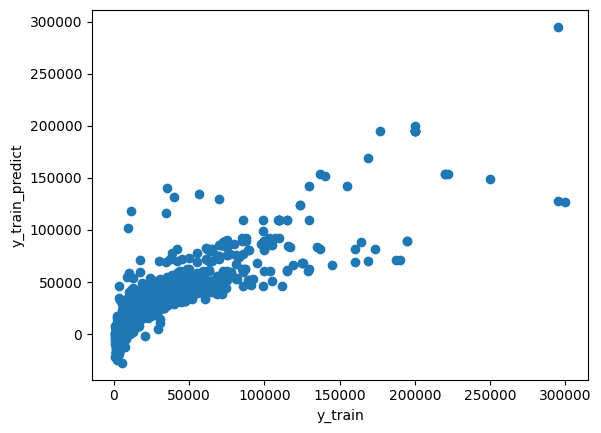

In [61]:
# Linear regression
y_train_predict = lr_model.predict(x_train)
# y_test_predict
plt.scatter(y_train,y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")
plt.show()

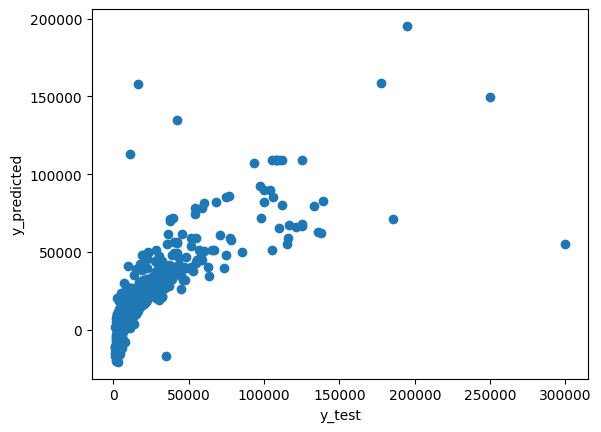

In [62]:
y_test_predict = lr_model.predict(x_test)
# y_test_predict
plt.scatter(y_test,y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

In [63]:
print(lr_model.score(x_train,y_train) *100)
print(lr_model.score(x_test,y_test) *100)

77.56859625418471
64.76211298738959


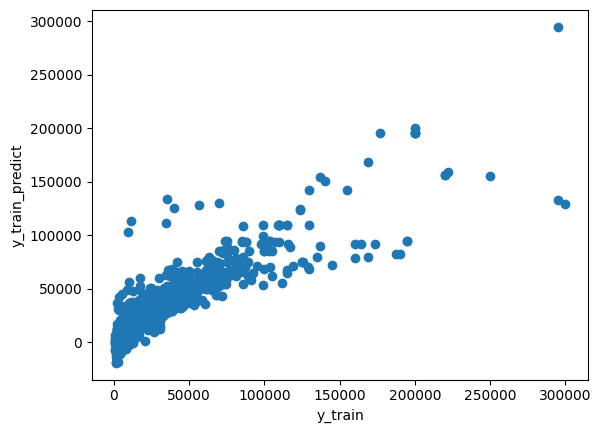

In [72]:
# polynomial regression
y_train_predict = poly_model.predict(x_train)
# y_test_predict
plt.scatter(y_train,y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")
plt.show()

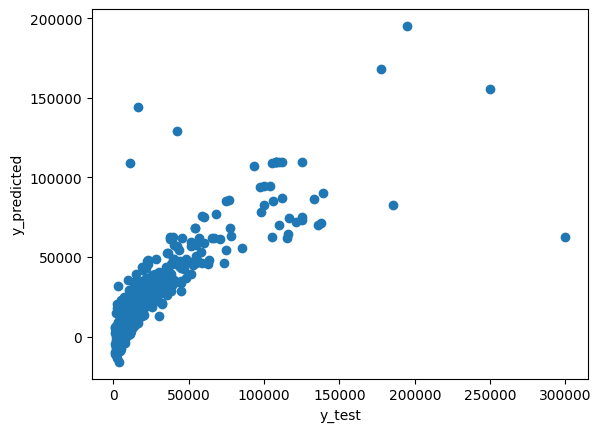

In [73]:
y_test_predict = poly_model.predict(x_test)
# y_test_predict
plt.scatter(y_test,y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

In [74]:
print(poly_model.score(x_train,y_train) *100)
print(poly_model.score(x_test,y_test) *100)
# from sklearn.metrics import r2_score
# print(r2_score(y_test,y_test_predict) *100)

81.14435685598164
70.88001508966859


## Model Dumping

In [75]:
# Here, the polynomial model with degree=2 have better accuracy than linear model.Thus , i choose polynomial model as final model
with open("car_price_predictor.pickle","wb") as f:
    pk.dump(poly_model,f)